In [1]:
#from cuml.manifold import TSNE as gTSNE
from sklearn.manifold import TSNE as cTSNE
import numpy as np
import json, os, tqdm
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gaussian_kde

In [6]:
df = pd.read_csv('../dataset/fpolymers_221123.csv', index_col=0)
df = df[~df.TG.isna()]
root = '/home/jhyang/WORKSPACES/vecs/feat'
ids  = json.load(open(os.path.join(root, 'ids.txt')))
vecs_01 = np.loadtxt(os.path.join(root, 'mol_max_.txt'))
vecs_02 = np.loadtxt(os.path.join(root, 'mol_max_u.txt'))
info_01 = pd.read_csv(os.path.join('../dataset/screen_01.csv'))
info_02 = pd.read_csv(os.path.join('../dataset/screen_02.csv'))
n = df.shape[0]

col_s = [f'SMILES_{x}' for x in 'ABCDE']
col_w = [f'FR_{x}' for x in 'ABCDE']
frate = []
ws = []
for id, row in df.iterrows():
    s = row[col_s].values
    w = row[col_w].fillna(0).values
    m = ['F' in _s for _s in s]
    ws.append(w)
    frate.append(np.sum(w[m])/np.sum(w))

cs = [
    df.TG.values + 273.15, 
    np.array(frate),
    np.sum(np.array(ws) != 0, axis=1),
]

ids[n], n, vecs_01.shape, vecs_02.shape
output = {}

- screening non-unique set of vector

In [145]:
mask = info_01.index.isin(info_02.ID)
np.savetxt(os.path.join(root, 'mol_max_u.txt'), np.vstack([vecs_01[:n], vecs_01[n:][mask]]), fmt='%.7f')

In [7]:
ids_c1 = ['FA-00298', 'FA-00301', 'FA-00353', 'FA-00411', 'FA-00412',
          'FA-00413', 'FA-00414', 'FA-00416', 'FA-00417', 'FA-00418',
          'FA-00419', 'FA-00420', 'FA-00421', 'FA-00422', 'FA-00424',
          'FA-00425', 'FA-00426', 'FA-00428', 'FA-00429', 'FA-00430',
          'FA-00431', 'FA-00432', 'FA-00433', 'FA-00434', 'FA-00435',
          'FA-00436', 'FA-00438', 'FA-00439', 'FA-00441', 'FA-00442',
          'FA-00443', 'FA-00444', 'FA-00445', 'FA-00447', 'FA-00448',
          'FA-00484']

mc1 = df.index.isin(ids_c1)
nc1 = np.sum(mc1)
nc2 = np.sum(~mc1)
vecs_c1 = vecs_01[:n][mc1]
vecs_c2 = vecs_01[:n][~mc1]
vecs_gen = vecs_01[n:]

In [4]:
_ws = df[col_w].fillna(0).values
_ws = _ws / np.sum(_ws, axis=1).reshape(-1,1)
col_fw = [f'fFR_{x}' for x in 'ABCDE']
for i, x in enumerate('ABCDE'):
    df[f'fFR_{x}'] = _ws.T[i]
df.loc[mc1, ['SMILES_A','SMILES_B','SMILES_E','fFR_A','fFR_B','fFR_E']]

,SMILES_A,SMILES_B,SMILES_E,fFR_A,fFR_B,fFR_E
ID,,,,,,
FA-00298,CC(=C)C(=O)OCC(C(F)(F)F)(F)F,CCCCCCCCCCCCCCCCCCOC(=O)C(C)=C,CC(=C)C(=O)OCCO,0.0,0.4,0.2
FA-00301,CC(=C)C(=O)OCC(C(F)(F)F)(F)F,CCCCCCCCCCCCCCCCCCOC(=O)C=C,CC(=C)C(=O)OCCO,0.0,0.4,0.2
FA-00353,CC(=C)C(=O)OCC(C(F)(F)F)(F)F,CC(=C)C(=O)OCC1CCCO1,CC(=C)C(=O)OCCO,0.0,0.4,0.2
FA-00411,FC(F)(F)COC(=O)C=C,CCCCCCCCCCCCCCCCCCOC(=O)C(C)=C,CC(=C)C(=O)OCCO,0.4,0.4,0.2
FA-00412,FC(F)(F)C(OC(=O)C=C)C(F)(F)F,CCCCCCCCCCCCCCCCCCOC(=O)C(C)=C,CC(=C)C(=O)OCCO,0.4,0.4,0.2
FA-00413,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)CCOC(=O)C=C,CCCCCCCCCCCCCCCCCCOC(=O)C(C)=C,CC(=C)C(=O)OCCO,0.4,0.4,0.2
FA-00414,C=CC(=O)OCC(C(C(F)(F)F)F)(F)F,CCCCCCCCCCCCCCCCCCOC(=O)C(C)=C,CC(=C)C(=O)OCCO,0.4,0.4,0.2
FA-00416,CC(=C)C(=O)OCC(F)(F)C(F)F,CCCCCCCCCCCCCCCCCCOC(=O)C(C)=C,CC(=C)C(=O)OCCO,0.4,0.4,0.2
FA-00417,CC(=C)C(=O)OCC(C(F)(F)F)(F)F,CCCCCCCCCCCCCCCCCCOC(=O)C(C)=C,CC(=C)C(=O)OCCO,0.4,0.4,0.2


In [ ]:
c = 5000
output_vecs = {}
for i in tqdm.tqdm(range((vecs.shape[0] - n) // c + 1)):
    tsne = gTSNE(method='fft', random_state=100, n_iter=2000)
    i1, i2 = n+i*c, n+(i+1)*c
    tvec = tsne.fit_transform(np.vstack([vecs[:n], vecs[i1:i2]]))
    output_vecs[i] = {'vec':tvec, 'id':np.hstack([ids[:n], ids[i1:i2]])}

Text(0.5, 0, '# of monomers')

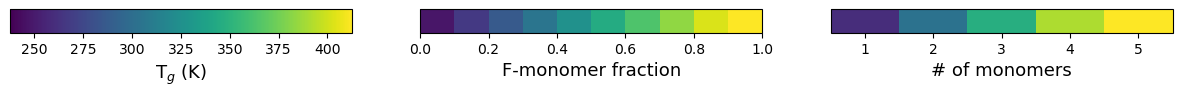

In [16]:
f, axs =plt.subplots(1,3,figsize=(15,0.3))
im = plt.scatter([0,1],[0,1], c=[237.5,412.5])
plt.colorbar(im, cax=axs[0], orientation='horizontal')
axs[0].set_xlabel('T$_g$ (K)', fontsize=13)
im = plt.scatter([0,1],[0,1], c=[0,0.9])
plt.colorbar(im, cax=axs[1], orientation='horizontal', boundaries=np.linspace(0,1,11))
axs[1].set_xlabel('F-monomer fraction', fontsize=13)
im = plt.scatter([0,1],[0,1], c=[0,4])
plt.colorbar(im, cax=axs[2], orientation='horizontal', boundaries=np.linspace(0,5,6))
axs[2].set_xticks([0.5, 1.5, 2.5, 3.5, 4.5], labels=['1','2','3','4','5'])
axs[2].set_xlabel('# of monomers', fontsize=13)

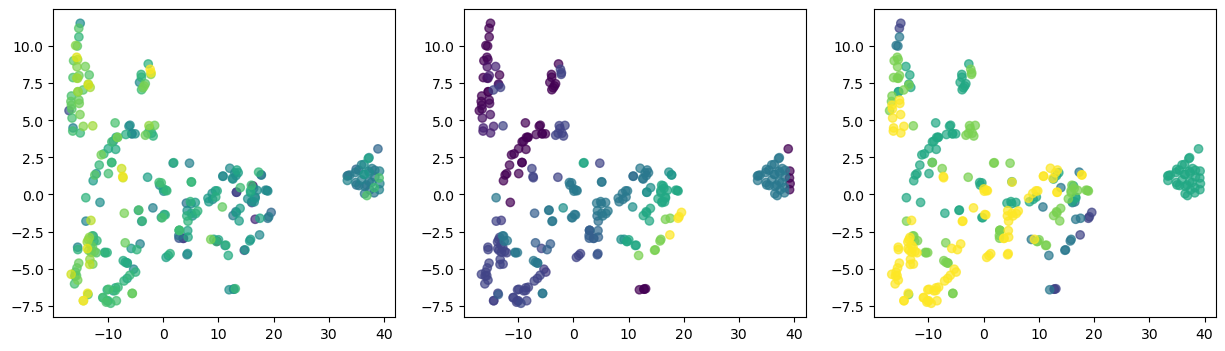

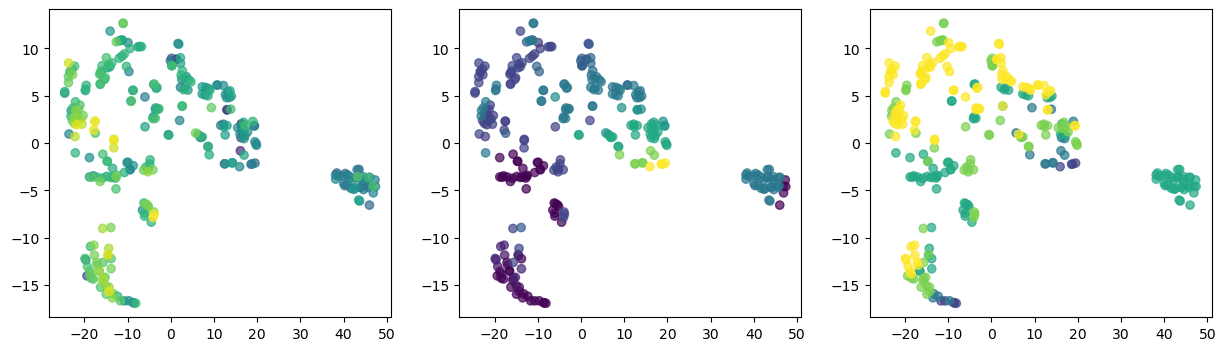

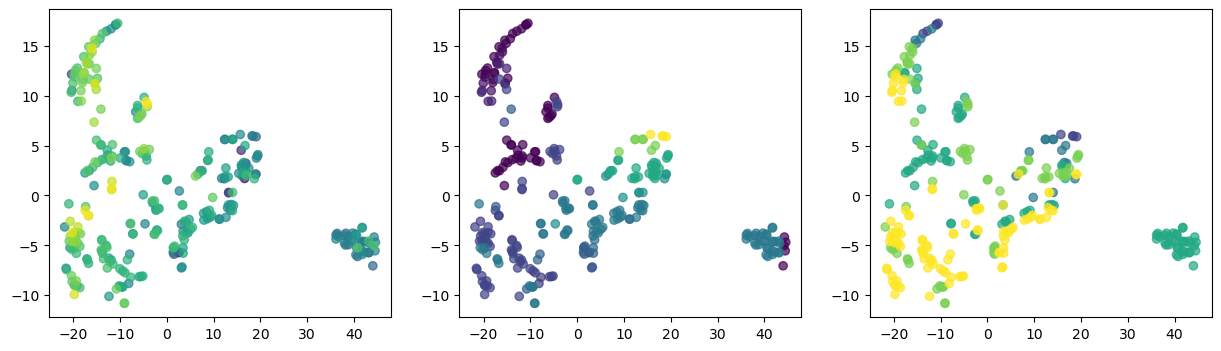

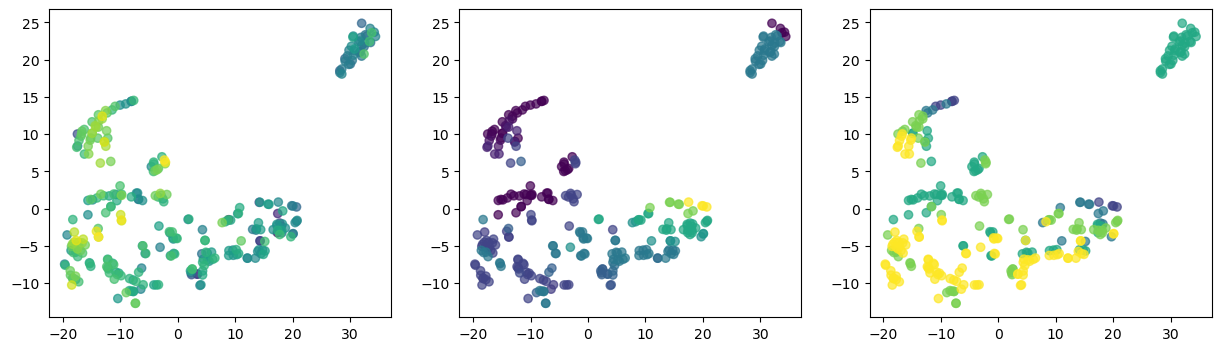

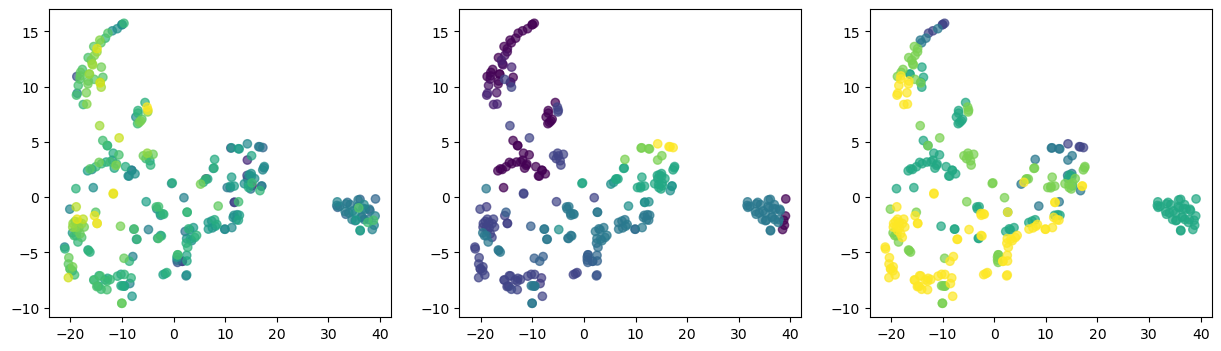

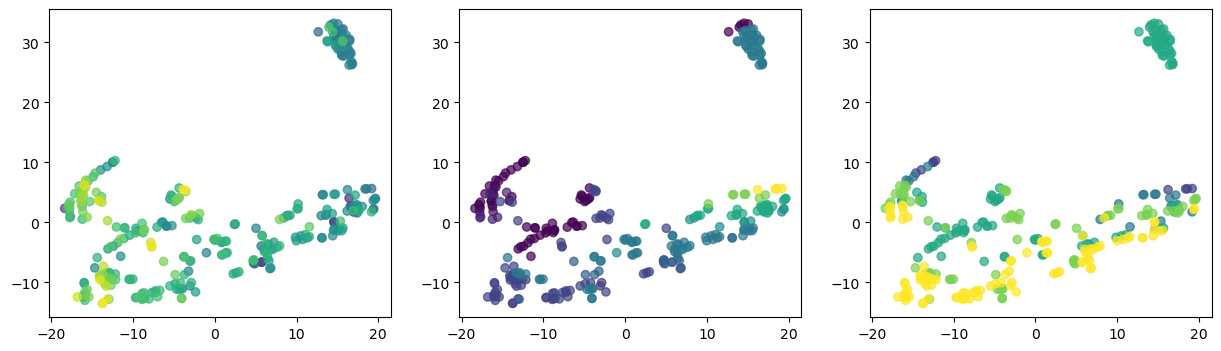

In [4]:
vs = [[237.5,412.5],[0,1],[0,5]]

pxs = [30, 22, 23, 24, 25, 26]
for px in pxs:
    f, axs = plt.subplots(1,3,figsize=(15,4))
    tsne = cTSNE(init='pca', learning_rate='auto', perplexity=px)
    tvec = tsne.fit_transform(vecs_01[:n])
    for ax, v, c in zip(axs, vs, cs):
        o = np.argsort(c)
    #    ax.set_xlim([-30,50])
    #    ax.set_ylim([-10,15])
        ax.scatter(*tvec[o].T, c=c[o], vmin=v[0], vmax=v[1], alpha=0.7)


In [25]:
ids_c1 = ['FA-00298', 'FA-00301', 'FA-00353', 'FA-00411', 'FA-00412',
          'FA-00413', 'FA-00414', 'FA-00416', 'FA-00417', 'FA-00418',
          'FA-00419', 'FA-00420', 'FA-00421', 'FA-00422', 'FA-00424',
          'FA-00425', 'FA-00426', 'FA-00428', 'FA-00429', 'FA-00430',
          'FA-00431', 'FA-00432', 'FA-00433', 'FA-00434', 'FA-00435',
          'FA-00436', 'FA-00438', 'FA-00439', 'FA-00441', 'FA-00442',
          'FA-00443', 'FA-00444', 'FA-00445', 'FA-00447', 'FA-00448',
          'FA-00484']

mc1 = df.index.isin(ids_c1)
nc1 = np.sum(mc1)
nc2 = np.sum(~mc1)
vecs_c1 = vecs_01[:n][mc1]
vecs_c2 = vecs_01[:n][~mc1]
vecs_gen = vecs_01[n:]

In [158]:
import pickle
k = 100
output = {}
for i1 in tqdm.tqdm(range(0, len(vecs_gen), k)):
    i2 = i1 + k
    tsne = cTSNE(init='pca')
    tvec = tsne.fit_transform(np.vstack([vecs_c1, vecs_c2, vecs_gen[i1:i2]]))
    output[f'{i1/k:.0f}'] = (tvec[:nc1], tvec[nc1:n], tvec[n:])
with open(os.path.join(root, 'mol_max_u.tsne.pkl'),'wb') as f:
    pickle.dump(output, f)

100%|██████████| 2288/2288 [30:18<00:00,  1.26it/s] 


In [ ]:
output_01 = {}
l = 0
m = 200
for i in range(40):
    i1 = (i + l) * m
    i2 = (i + l + 1) * m
    tsne = cTSNE(init='pca', learning_rate='auto')
    tvecs = tsne.fit_transform(np.vstack([vecs_c1, vecs_c2, vecs_gen[i1:i2]]))
    output_01[i+l] = (tvecs[:nc1], tvecs[nc1:n], tvecs[n:])

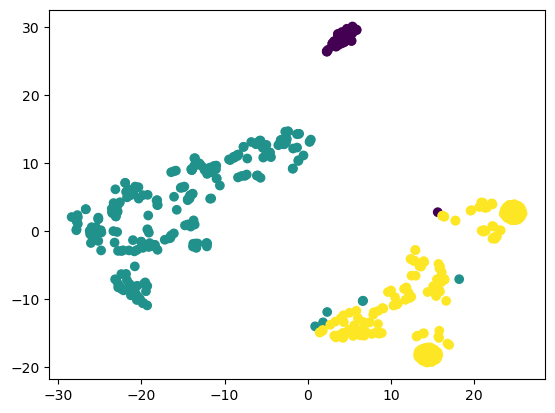

In [8]:
tsne = cTSNE(init='pca', learning_rate='auto')
tvecs = tsne.fit_transform(np.vstack([vecs_c1, vecs_c2, vecs_gen[0:200]]))
#output_01[i+l] = (tvecs[:nc1], tvecs[nc1:n], tvecs[n:])
c = np.zeros(tvecs.shape[0])
c[n:] += np.ones(200)
c[nc1:] += np.ones(200+nc2)
plt.scatter(*tvecs.T, c=c)

/home/jhyang/anaconda3/envs/tsne/lib/python3.9/site-packages/cuml/internals/api_decorators.py:794: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)


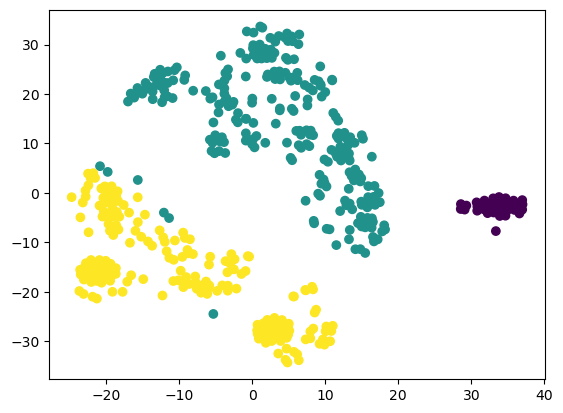

In [10]:
tsne = gTSNE()
tvecs = tsne.fit_transform(np.vstack([vecs_c1, vecs_c2, vecs_gen[0:200]]))
#output_01[i+l] = (tvecs[:nc1], tvecs[nc1:n], tvecs[n:])
c = np.zeros(tvecs.shape[0])
c[n:] += np.ones(200)
c[nc1:] += np.ones(200+nc2)
plt.scatter(*tvecs.T, c=c)

/home/jhyang/anaconda3/envs/tsne/lib/python3.9/site-packages/cuml/internals/api_decorators.py:794: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)


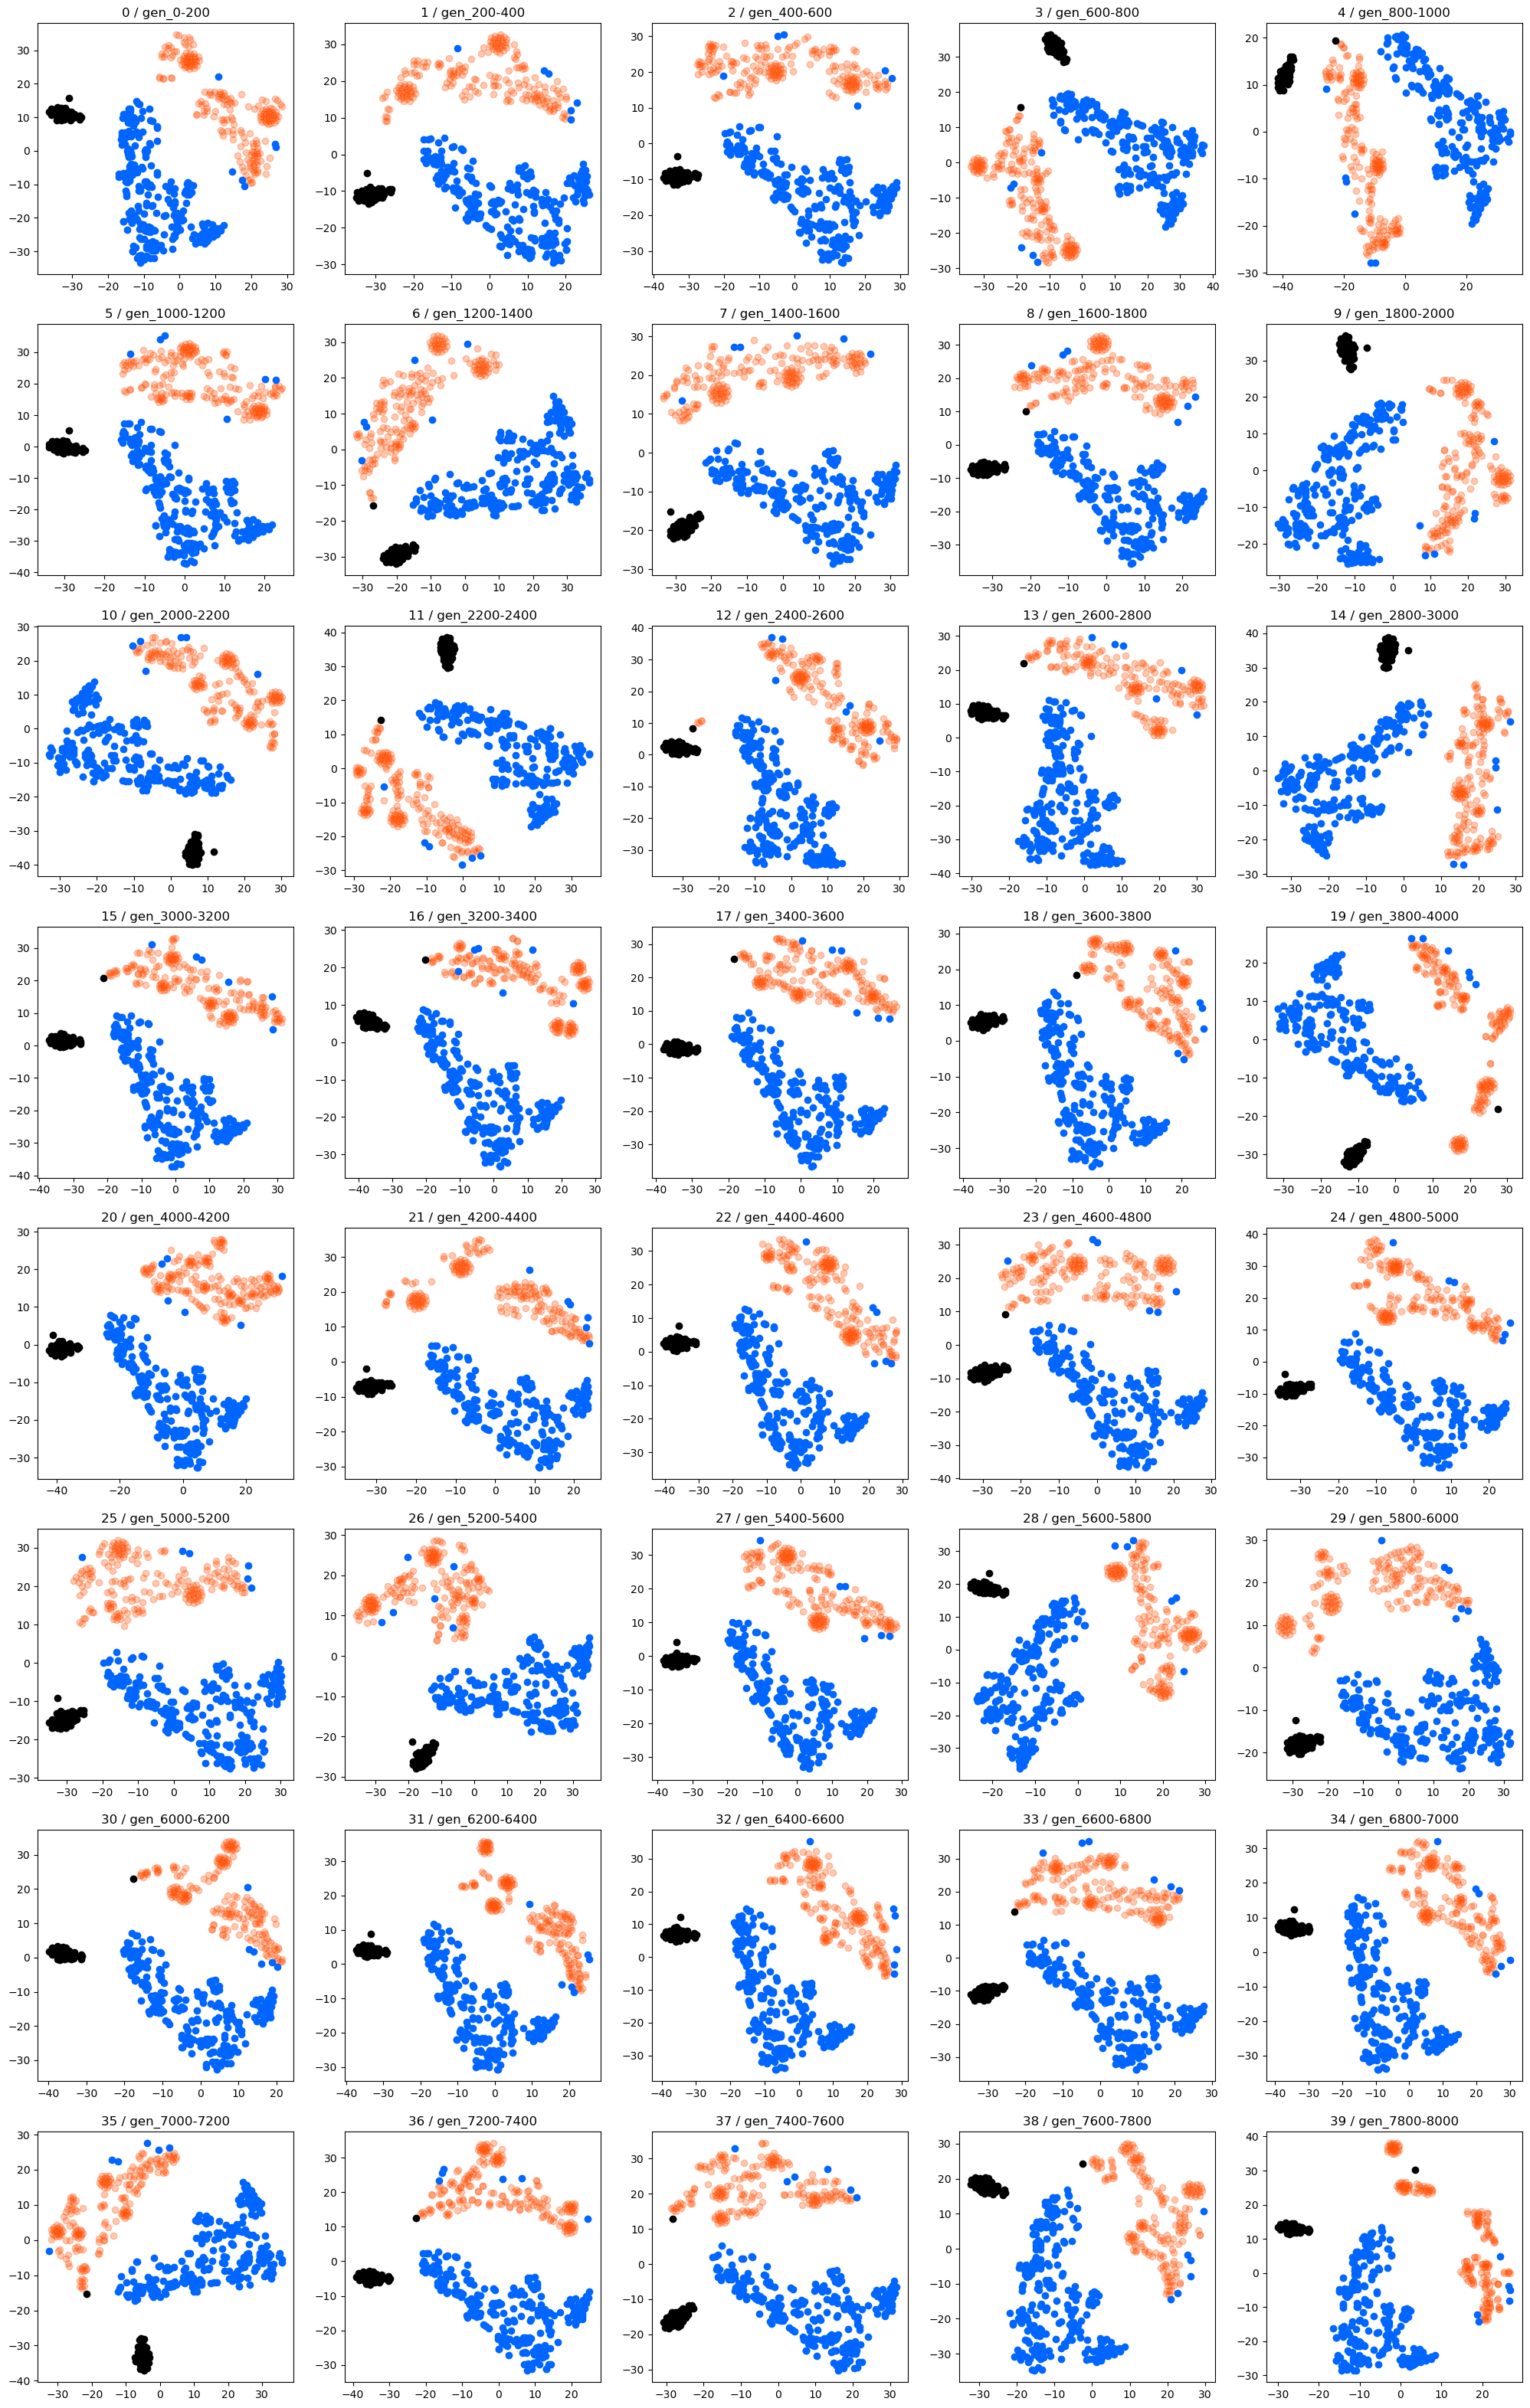

In [14]:
nrow, ncol = 8, 5
m = 200
l = 0
f, axs = plt.subplots(nrow,ncol,figsize=(ncol*5, nrow*5))
output = {}
for i, ax in enumerate(axs.reshape(-1)):
    i1 = (i + l) * m
    i2 = (i + l + 1) * m
    if str(i+l) not in output.keys():
        tsne = gTSNE(method='fft', random_state=100)
        tvecs = tsne.fit_transform(np.vstack([vecs_c1, vecs_c2, vecs_gen[i1:i2]]))
        tvec_c1 = tvecs[:nc1]
        tvec_c2 = tvecs[nc1:n]
        tvec_gen = tvecs[n:]
        output[str(i + l)] = (tvec_c1, tvec_c2, tvec_gen)
    tvec_c1, tvec_c2, tvec_gen = output[str(i+l)]
    ax.set_title(f'{i+l} / gen_{i1}-{i2}')
    ax.scatter(*tvec_gen.T, color=[1,0.3,0], alpha=0.3)
    ax.scatter(*tvec_c1.T, color=[0,0,0])
    ax.scatter(*tvec_c2.T, color=[0,0.4,1])

In [83]:
i_ = 34
ss_ = df.loc[ids_c1[i_], col_s].values
ws_ = df.loc[ids_c1[i_], col_w].fillna(0).values
o = np.argsort(ss_)
print(' | '.join([f'{s_} / {w_}' for s_, w_ in zip(ss_[ws_ != 0], ws_[ws_ != 0])]))

CCCCCCCCCCCCCCCCCCOC(=O)C(C)=C / 6.0 | COC(=O)C(C)=C / 2.0 | CC(=C)C(=O)OC12CC3CC(C1)CC(C3)(C2)O / 2.0


In [105]:
dists = np.sqrt(np.sum(np.square(vecs_gen - vecs_c1[34]) / (1 + np.var(vecs_01, axis=0)), axis=1))

In [109]:
info_01.loc[np.argsort(dists)[:10]]

,SMILES_A,SMILES_B,SMILES_C,SMILES_D,SMILES_E,FR_A,FR_B,FR_C,FR_D,FR_E,ID,TG
3947,C=C(C(=O)O)C(F)(F)F,C=CC(=O)O,CCCCCCCCCCCCCCCCCCOC(=O)C=C,OCCOC(=O)C=C,CC(=C)C(=O)OCCO,0.2,0.2,0.4,0.0,0.2,3947,3947
3917,C=C(C(=O)O)C(F)(F)F,C=CC(=O)O,CCCCCCCCCCCCCCCCCCOC(=O)C=C,CCOC(=O)C(C)=C,CC(=C)C(=O)OCCO,0.2,0.2,0.4,0.0,0.2,3917,3917
3923,C=C(C(=O)O)C(F)(F)F,C=CC(=O)O,CCCCCCCCCCCCCCCCCCOC(=O)C=C,CN(C)CCOC(=O)C(C)=C,CC(=C)C(=O)OCCO,0.2,0.2,0.4,0.0,0.2,3923,3923
3929,C=C(C(=O)O)C(F)(F)F,C=CC(=O)O,CCCCCCCCCCCCCCCCCCOC(=O)C=C,COC(=O)C(C)=C,CC(=C)C(=O)OCCO,0.2,0.2,0.4,0.0,0.2,3929,3929
3905,C=C(C(=O)O)C(F)(F)F,C=CC(=O)O,CCCCCCCCCCCCCCCCCCOC(=O)C=C,CCCOC(=O)C(C)=C,CC(=C)C(=O)OCCO,0.2,0.2,0.4,0.0,0.2,3905,3905
3935,C=C(C(=O)O)C(F)(F)F,C=CC(=O)O,CCCCCCCCCCCCCCCCCCOC(=O)C=C,COC(=O)C=C,CC(=C)C(=O)OCCO,0.2,0.2,0.4,0.0,0.2,3935,3935
3941,C=C(C(=O)O)C(F)(F)F,C=CC(=O)O,CCCCCCCCCCCCCCCCCCOC(=O)C=C,O=C1N(OC(=O)C(=C)C)C(=O)CC1,CC(=C)C(=O)OCCO,0.2,0.2,0.4,0.0,0.2,3941,3941
3899,C=C(C(=O)O)C(F)(F)F,C=CC(=O)O,CCCCCCCCCCCCCCCCCCOC(=O)C=C,CCCCOC(=O)C(C)=C,CC(=C)C(=O)OCCO,0.2,0.2,0.4,0.0,0.2,3899,3899
3893,C=C(C(=O)O)C(F)(F)F,C=CC(=O)O,CCCCCCCCCCCCCCCCCCOC(=O)C=C,CCCCCCOC(=O)C(C)=C,CC(=C)C(=O)OCCO,0.2,0.2,0.4,0.0,0.2,3893,3893
3911,C=C(C(=O)O)C(F)(F)F,C=CC(=O)O,CCCCCCCCCCCCCCCCCCOC(=O)C=C,CCCOC(=O)C=C,CC(=C)C(=O)OCCO,0.2,0.2,0.4,0.0,0.2,3911,3911


In [95]:
near_idxs = np.argsort(np.sum(np.square(output['79'][2] - output['79'][0][i_]), axis=1))[:10]
for i, row in info_01.loc[79*200 + near_idxs].iterrows():
    ss_ = row[col_s].values
    ws_ = row[col_w].fillna(0).values
    print(i, ' | '.join([f'{s_} / {w_}' for s_, w_ in zip(ss_[ws_ != 0], ws_[ws_ != 0])]))

15888 C=C(C(=O)O)C(F)(F)F / 0.2 | CCCCCCCCCCCCCCCCCCOC(=O)C=C / 0.6 | CC(=C)C(=O)OCCO / 0.2
15882 C=C(C(=O)O)C(F)(F)F / 0.2 | CCCCCCCCCCCCCCCCCCOC(=O)C(C)=C / 0.6 | CC(=C)C(=O)OCCO / 0.2
15883 C=C(C(=O)O)C(F)(F)F / 0.2 | C=CC(=O)Oc1ccccc1 / 0.2 | CCCCCCCCCCCCCCCCCCOC(=O)C(C)=C / 0.4 | CC(=C)C(=O)OCCO / 0.2
15889 C=C(C(=O)O)C(F)(F)F / 0.2 | C=CC(=O)Oc1ccccc1 / 0.2 | CCCCCCCCCCCCCCCCCCOC(=O)C=C / 0.4 | CC(=C)C(=O)OCCO / 0.2
15884 C=C(C(=O)O)C(F)(F)F / 0.2 | C=CC(=O)Oc1ccccc1 / 0.4 | CCCCCCCCCCCCCCCCCCOC(=O)C(C)=C / 0.2 | CC(=C)C(=O)OCCO / 0.2
15890 C=C(C(=O)O)C(F)(F)F / 0.2 | C=CC(=O)Oc1ccccc1 / 0.4 | CCCCCCCCCCCCCCCCCCOC(=O)C=C / 0.2 | CC(=C)C(=O)OCCO / 0.2
15886 C=C(C(=O)O)C(F)(F)F / 0.2 | C=CC(=O)OCCC#N / 0.2 | C=CC(=O)Oc1ccccc1 / 0.2 | CCCCCCCCCCCCCCCCCCOC(=O)C(C)=C / 0.2 | CC(=C)C(=O)OCCO / 0.2
15892 C=C(C(=O)O)C(F)(F)F / 0.2 | C=CC(=O)OCCC#N / 0.2 | C=CC(=O)Oc1ccccc1 / 0.2 | CCCCCCCCCCCCCCCCCCOC(=O)C=C / 0.2 | CC(=C)C(=O)OCCO / 0.2
15870 C=C(C(=O)O)C(F)(F)F / 0.2 | CC1C2CC(C1(C)C)C

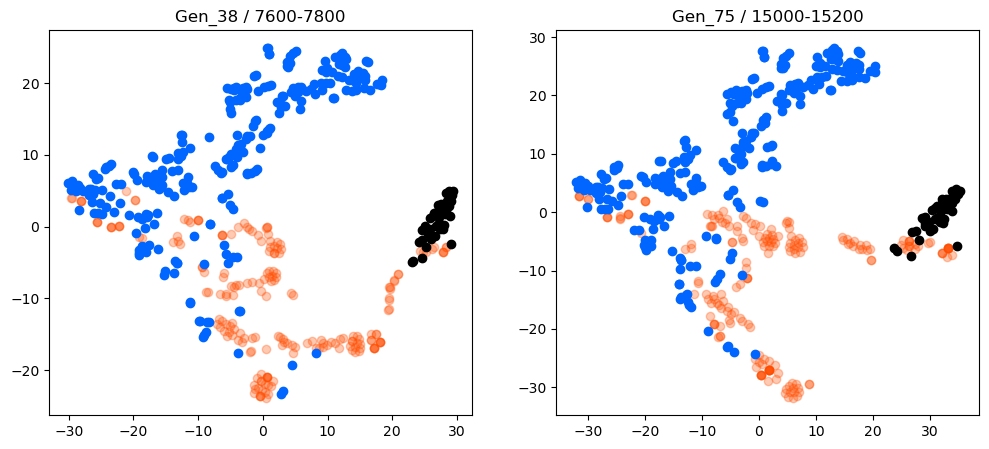

In [135]:
f, axs = plt.subplots(1,2,figsize=(12,5))
ks = [38, 75]
for ax, k in zip(axs, ks):
    tvec_c1, tvec_c2, tvec_gen = output[k]
    i1 = k*200
    i2 = i1 + 200
    ax.set_title(f'Gen_{k} / {i1}-{i2}')
    ax.scatter(*tvec_gen.T, color=[1,0.3,0], alpha=0.3)
    ax.scatter(*tvec_c1.T, color=[0,0,0])
    ax.scatter(*tvec_c2.T, color=[0,0.4,1])

/tmp/ipykernel_3061/502954294.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmax' will be ignored
  im = plt.scatter(*vg.T, alpha=0.6, vmax=1)


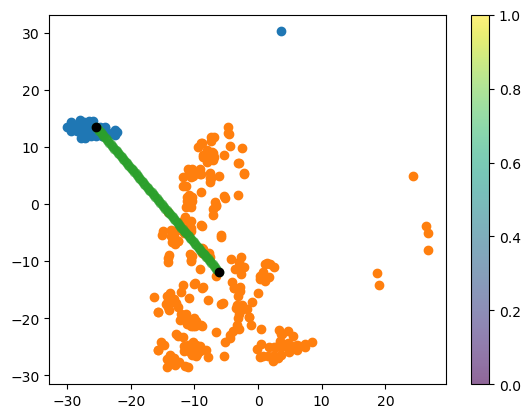

In [24]:
gx, gy = np.mgrid[-100:100:100j, -100:100:100j]
grid = np.vstack([gx.ravel(), gy.ravel()])

v1, v2 = tvec_c1, tvec_c2
k = gaussian_kde(np.vstack([v1, v2]).T, bw_method=0.25)
c1 = np.mean(v1, axis=0)
c2 = np.mean(v2, axis=0)
vg = np.hstack([np.linspace(c1[0], c2[0], 100).reshape(-1,1), np.linspace(c1[1], c2[1], 100).reshape(-1,1)])
c = k(vg.T)
plt.scatter(*v1.T)
plt.scatter(*v2.T)
im = plt.scatter(*vg.T, alpha=0.6, vmax=1)
plt.scatter(*c1, color=[0,0,0])
plt.scatter(*c2, color=[0,0,0])
plt.colorbar(im)

In [ ]:
dv1 = v1[np.newaxis, ...] - vg[:, np.newaxis]
dv2 = v2[np.newaxis, ...] - vg[:, np.newaxis]
d1 = np.sqrt(np.sum(np.square(dv1), axis=-1))
d2 = np.sqrt(np.sum(np.square(dv2), axis=-1))


In [ ]:
o1 = np.argsort(d1, axis=1)
i = 4
d1[i][o1[i]]

In [ ]:
vgx, vgy = vg.T
mask = (vgy < 0) & (vgy > -20) & (vgx < 20) & (vgx > 5)
idxs = 75*200 + np.where(mask)[0]
plt.scatter(*v1.T, alpha=0.7, color=[0,0,0])
plt.scatter(*v2.T, alpha=0.7, color=[1,0,0])
plt.scatter(*vg[mask].T, c=c[mask])
print(idxs)

In [ ]:
info.loc[idxs].to_csv('../dataset/p00015000.csv')

In [151]:
vecs_gen.shape

(228720, 399)